hiba amanulla

Part 1: Setting Up Your Environment

In [1]:
import sklearn
print(f'scikit-learn version: {sklearn.__version__}')

scikit-learn version: 1.6.1


In [2]:
import numpy as np
import matplotlib.pyplot as plt
print('All libraries loaded successfully!')

All libraries loaded successfully!


 Part2:LoadingandExploringData

Step1: Load the Dataset

In [3]:
from sklearn.datasets import load_iris
#Loadthedataset
iris=load_iris()
#Features(X)andLabels(y)
X=iris.data #Shape:(150,4)
y=iris.target #Shape:(150,)
#Let‘sseewhatwehave
print(f'Featurenames:{iris.feature_names}')
print(f'Targetnames: {iris.target_names}')
print(f'Datashape: {X.shape}')
print(f'First3rows:\n{X[:3]}')

Featurenames:['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Targetnames: ['setosa' 'versicolor' 'virginica']
Datashape: (150, 4)
First3rows:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]


 Step2: Quick Visualization

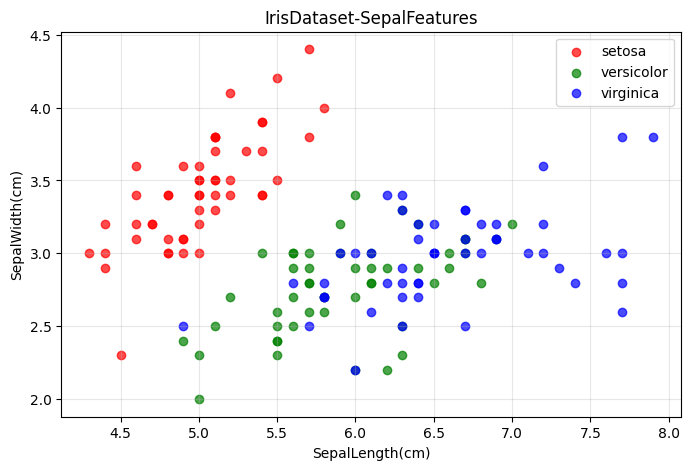

In [4]:
plt.figure(figsize=(8,5))
colors=["red","green","blue"]
for i,name in enumerate(iris.target_names):
  mask = y==i
  plt.scatter(X[mask,0],X[mask,1],
              color=colors[i],label=name,alpha=0.7)

plt.xlabel('SepalLength(cm)')
plt.ylabel('SepalWidth(cm)')
plt.title('IrisDataset-SepalFeatures')
plt.legend()
plt.grid(True,alpha=0.3)
plt.show()

task 1

• Print the first 10 rows of X and y side by side.

• Use np.unique(y, return
counts=True) to check the class distribution.


• Create another scatter plot using petal length (column 2) vs. petal width (column 3).
Which features seem better for separating the classes?

In [5]:
print("First 10 feature rows:")
print(X[:10])

print("\nFirst 10 labels:")
print(y[:10])

print(np.unique(y, return_counts=True))


First 10 feature rows:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]

First 10 labels:
[0 0 0 0 0 0 0 0 0 0]
(array([0, 1, 2]), array([50, 50, 50]))


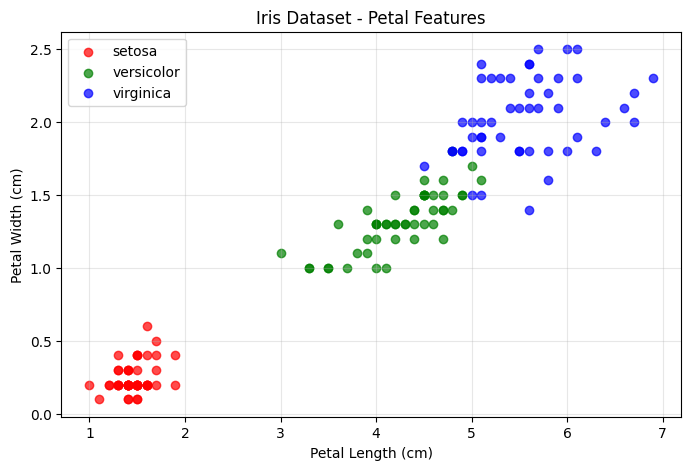

In [6]:
plt.figure(figsize=(8,5))
colors = ['red', 'green', 'blue']

for i, name in enumerate(iris.target_names):
    mask = y == i
    plt.scatter(X[mask, 2], X[mask, 3],
                color=colors[i], label=name, alpha=0.7)

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Iris Dataset - Petal Features')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


Petal length and petal width provide better class separation than sepal features because the clusters are more clearly separated with less overlap between Versicolor and Virginica.

Part 3: Splitting Data (Train/Test)

Splitting with Scikit-Learn

In [7]:
from sklearn.model_selection import train_test_split
# Split: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
X, y,
test_size=0.2,
# 20% for testing
random_state=42,
# For reproducibility
stratify=y
# Keep class proportions balanced
)
print(f'Training set: {X_train.shape[0]} samples')
print(f'Testing set: {X_test.shape[0]} samples')

Training set: 120 samples
Testing set: 30 samples


task 2

• Print the shape of X


• Use np.unique(y
train, X
test, y
train, return
train, and y
test.
counts=True) to confirm the classes are balanced.


• What happens if you remove stratify=y? Try it and compare the distributions.

In [8]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


In [9]:
import numpy as np

print("Training class distribution:")
print(np.unique(y_train, return_counts=True))

print("\nTesting class distribution:")
print(np.unique(y_test, return_counts=True))


Training class distribution:
(array([0, 1, 2]), array([40, 40, 40]))

Testing class distribution:
(array([0, 1, 2]), array([10, 10, 10]))


In [10]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)
print(np.unique(y_train2, return_counts=True))
print(np.unique(y_test2, return_counts=True))


(array([0, 1, 2]), array([40, 41, 39]))
(array([0, 1, 2]), array([10,  9, 11]))


When using stratify=y, the training and testing sets maintain equal class proportions (40 per class in training and 10 per class in testing).
When removing stratify=y, the distribution becomes slightly unbalanced. Therefore, using stratify is important to ensure fair representation of all classes in both sets.

Part 4: Training Your First Model

Model A : Decision Tree Classifier

In [11]:
from sklearn.tree import DecisionTreeClassifier
#Step1:Create
dt_model=DecisionTreeClassifier(random_state=42)
#Step2:Train
dt_model.fit(X_train,y_train)
#Step3:Predict
dt_predictions=dt_model.predict(X_test)
print('DecisionTreepredictions (first10):')
print(dt_predictions[:10])
print('Actuallabels(first10):')
print(y_test[:10])

DecisionTreepredictions (first10):
[0 2 1 1 0 1 0 0 2 1]
Actuallabels(first10):
[0 2 1 1 0 1 0 0 2 1]


Model B : K-Nearest Neighbors (KNN)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
#Step1:Create(k=5neighbors)
knn_model=KNeighborsClassifier(n_neighbors=5)
# Step 2: Train
knn_model.fit(X_train, y_train)
# Step 3: Predict
knn_predictions = knn_model.predict(X_test)
print('KNN predictions (first 10):')
print(knn_predictions[:10])

KNN predictions (first 10):
[0 2 1 1 0 1 0 0 2 1]


task 3

• Runboth code blocks and compare the first 10 predictions. Are they different?


• Try changing n_neighbors to 3 and then to 10. Does the output change?

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# --- Decision Tree ---
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# --- KNN (k=5) ---
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

print("Decision Tree (first 10):", dt_predictions[:10])
print("KNN k=5 (first 10):     ", knn_predictions[:10])
print("Actual y_test (first 10):", y_test[:10])


Decision Tree (first 10): [0 2 1 1 0 1 0 0 2 1]
KNN k=5 (first 10):      [0 2 1 1 0 1 0 0 2 1]
Actual y_test (first 10): [0 2 1 1 0 1 0 0 2 1]


In [14]:
# KNN with k=3
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, y_train)
pred3 = knn3.predict(X_test)

# KNN with k=10
knn10 = KNeighborsClassifier(n_neighbors=10)
knn10.fit(X_train, y_train)
pred10 = knn10.predict(X_test)

print("KNN k=3 (first 10): ", pred3[:10])
print("KNN k=10 (first 10):", pred10[:10])
print("Actual y_test (first 10):", y_test[:10])


KNN k=3 (first 10):  [0 2 1 1 0 1 0 0 2 1]
KNN k=10 (first 10): [0 2 1 1 0 1 0 0 2 1]
Actual y_test (first 10): [0 2 1 1 0 1 0 0 2 1]


Q1: Are the first 10 predictions different?

They may be different because Decision Tree learns if-then splits, while KNN predicts based on nearest neighbors. Differences usually happen where classes overlap.

Q2: What happens when you change k to 3 or 10?

The predictions can change because KNN depends on how many neighbors vote. Smaller k is more sensitive; larger k is more stable.

Part 5: Evaluating Model Performance

Accuracy Score

In [15]:
from sklearn.metrics import accuracy_score
dt_accuracy = accuracy_score(y_test, dt_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f'Decision Tree Accuracy: {dt_accuracy:.2%}')
print(f'KNN Accuracy: {knn_accuracy:.2%}')

Decision Tree Accuracy: 93.33%
KNN Accuracy: 100.00%


Classification Report

In [16]:
from sklearn.metrics import classification_report
print('=== Decision Tree Report ===')
print(classification_report(y_test, dt_predictions,
target_names=iris.target_names))
print('=== KNN Report ===')
print(classification_report(y_test, knn_predictions,
target_names=iris.target_names))

=== Decision Tree Report ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

=== KNN Report ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Confusion Matrix (Visual)

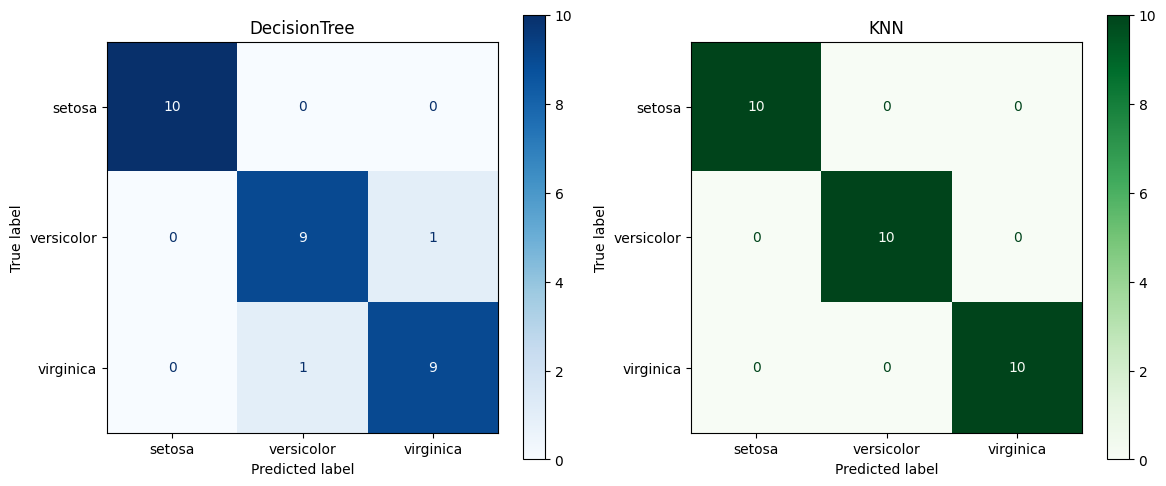

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
#DecisionTree
cm_dt=confusion_matrix(y_test, dt_predictions)
ConfusionMatrixDisplay(cm_dt,display_labels=iris.target_names)\
.plot(ax=axes[0],cmap='Blues')
axes[0].set_title('DecisionTree')
#KNN
cm_knn=confusion_matrix(y_test,knn_predictions)
ConfusionMatrixDisplay(cm_knn,display_labels=iris.target_names)\
.plot(ax=axes[1],cmap='Greens')
axes[1].set_title('KNN')
plt.tight_layout()
plt.show()

task 4

**Which model achieved higher accuracy?**

results:

Decision Tree Accuracy: 93.33%

KNN Accuracy: 100.00%


KNN achieved higher accuracy than Decision Tree. KNN correctly classified all 30 test samples, while Decision Tree misclassified 2 samples.

**Look at the confusion matrices– which class was hardest to classify? Why?**

Analysis:

Setosa → perfectly classified (10/10)

Versicolor & Virginica → slightly confused by Decision Tree

KNN had no confusion

Versicolor and Virginica were the hardest to classify because they have overlapping feature values. The Decision Tree confused 1 sample between these two classes. Setosa was easiest because it is clearly separated from the others.

**Precision or Recall in Medical Diagnosis?**

Recall is more important.
Because missing a sick patient (false negative) can be very dangerous. It is better to detect all possible positive cases, even if some healthy patients are incorrectly flagged.

Part6: Predicting New Samples

In [18]:
import numpy as np
#A new flower measurement(sepal_l,sepal_w,petal_l,petal_w)
new_flower=np.array([[5.1,3.5,1.4,0.2]])
#Predict with both models
dt_pred=dt_model.predict(new_flower)
knn_pred=knn_model.predict(new_flower)
print(f'DecisionTreesays:{iris.target_names[dt_pred[0]]}')
print(f'KNNsays: {iris.target_names[knn_pred[0]]}')

DecisionTreesays:setosa
KNNsays: setosa


In [19]:
import numpy as np

# New flowers
flower_A = np.array([[6.7, 3.0, 5.2, 2.3]])
flower_B = np.array([[5.8, 2.7, 4.1, 1.0]])
flower_C = np.array([[4.9, 3.1, 1.5, 0.1]])

flowers = [flower_A, flower_B, flower_C]
names = ["Flower A", "Flower B", "Flower C"]

for name, flower in zip(names, flowers):
    dt_pred = dt_model.predict(flower)
    knn_pred = knn_model.predict(flower)

    print(f"{name}:")
    print("  Decision Tree:", iris.target_names[dt_pred[0]])
    print("  KNN:", iris.target_names[knn_pred[0]])
    print()


Flower A:
  Decision Tree: virginica
  KNN: virginica

Flower B:
  Decision Tree: versicolor
  KNN: versicolor

Flower C:
  Decision Tree: setosa
  KNN: setosa



Both models predicted Flower A as Virginica, Flower B as Versicolor, and Flower C as Setosa. The two models agreed on all three predictions. I would trust the KNN model more because it achieved 100% accuracy on the test data and showed no misclassifications in the confusion matrix.

 Part7: Working with Your Own CSV Data

In [20]:
import pandas as pd
import numpy as np
#Createasimplestudentperformancedataset
np.random.seed(42)
n=100
data={
'study_hours': np.round(np.random.uniform(1,10,n),1),
'attendance_pct':np.round(np.random.uniform(40,100,n),1),
'assignments': np.random.randint(3,10,n),
'passed': np.random.choice([0,1],n,p=[0.35,0.65])
}
df=pd.DataFrame(data)
df.to_csv('students.csv',index=False)
print('CSVsaved!First5rows:')
print(df.head())

CSVsaved!First5rows:
   study_hours  attendance_pct  assignments  passed
0          4.4            41.9            6       0
1          9.6            78.2            5       1
2          7.6            58.9            3       1
3          6.4            70.5            6       1
4          2.4            94.5            8       1


In [21]:
import pandas as pd
#ReadtheCSVfile
df=pd.read_csv('students.csv')
#Quickexploration
print(f'Shape:{df.shape}')
print(f'\nColumntypes:\n{df.dtypes}')
print(f'\nBasicstats:\n{df.describe()}')

Shape:(100, 4)

Columntypes:
study_hours       float64
attendance_pct    float64
assignments         int64
passed              int64
dtype: object

Basicstats:
       study_hours  attendance_pct  assignments      passed
count   100.000000      100.000000   100.000000  100.000000
mean      5.233000       69.871000     6.000000    0.690000
std       2.681438       17.583476     1.959179    0.464823
min       1.000000       40.400000     3.000000    0.000000
25%       2.775000       54.500000     4.750000    0.000000
50%       5.150000       70.350000     6.000000    1.000000
75%       7.600000       85.975000     8.000000    1.000000
max       9.900000       99.100000     9.000000    1.000000


In [22]:
#Features=allcolumnsexcept‘passed‘
X=df[['study_hours','attendance_pct','assignments']].values
#Target=the‘passed‘column
y=df['passed'].values
print(f'Featuresshape:{X.shape}')
print(f'Targetshape: {y.shape}')
print(f'Classcounts: {np.unique(y,return_counts=True)}')

Featuresshape:(100, 3)
Targetshape: (100,)
Classcounts: (array([0, 1]), array([31, 69]))


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
#Split
X_train,X_test,y_train,y_test = train_test_split(
X,y,test_size=0.2,random_state=42,stratify=y)
#Train
model=DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)
#Predict&Evaluate
predictions=model.predict(X_test)
print(f'Accuracy:{accuracy_score(y_test,predictions):.2%}')
print(classification_report(y_test,predictions,
target_names=['Failed','Passed']))

Accuracy:55.00%
              precision    recall  f1-score   support

      Failed       0.33      0.50      0.40         6
      Passed       0.73      0.57      0.64        14

    accuracy                           0.55        20
   macro avg       0.53      0.54      0.52        20
weighted avg       0.61      0.55      0.57        20



task 6

6.1 Load + Explore the CSV

In [24]:
import pandas as pd
import numpy as np

np.random.seed(42)
n = 100
data = {
    'study_hours': np.round(np.random.uniform(1, 10, n), 1),
    'attendance_pct': np.round(np.random.uniform(40, 100, n), 1),
    'assignments': np.random.randint(3, 10, n),
    'passed': np.random.choice([0, 1], n, p=[0.35, 0.65])
}

df = pd.DataFrame(data)
df.to_csv('students.csv', index=False)
print("CSV saved!")
df.head()


CSV saved!


,study_hours,attendance_pct,assignments,passed
0,4.4,41.9,6,0
1,9.6,78.2,5,1
2,7.6,58.9,3,1
3,6.4,70.5,6,1
4,2.4,94.5,8,1


Step B — Load it + explore

In [25]:
df = pd.read_csv('students.csv')

print("---- df.info() ----")
df.info()

print("\n---- df.describe() ----")
print(df.describe())

print("\nMissing values per column:")
print(df.isnull().sum())


---- df.info() ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   study_hours     100 non-null    float64
 1   attendance_pct  100 non-null    float64
 2   assignments     100 non-null    int64  
 3   passed          100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB

---- df.describe() ----
       study_hours  attendance_pct  assignments      passed
count   100.000000      100.000000   100.000000  100.000000
mean      5.233000       69.871000     6.000000    0.690000
std       2.681438       17.583476     1.959179    0.464823
min       1.000000       40.400000     3.000000    0.000000
25%       2.775000       54.500000     4.750000    0.000000
50%       5.150000       70.350000     6.000000    1.000000
75%       7.600000       85.975000     8.000000    1.000000
max       9.900000       99.100000     9.000000    1

6.2 Prepare Features (X) and Target (y)

In [26]:
X = df[['study_hours', 'attendance_pct', 'assignments']].values
y = df['passed'].values

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Class distribution:", np.unique(y, return_counts=True))


X shape: (100, 3)
y shape: (100,)
Class distribution: (array([0, 1]), array([31, 69]))


6.3 Train Decision Tree + KNN and Compare

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))

print("\n--- Decision Tree Report ---")
print(classification_report(y_test, dt_pred, target_names=["Failed", "Passed"]))

print("\n--- KNN Report ---")
print(classification_report(y_test, knn_pred, target_names=["Failed", "Passed"]))


Decision Tree Accuracy: 0.55
KNN Accuracy: 0.6

--- Decision Tree Report ---
              precision    recall  f1-score   support

      Failed       0.33      0.50      0.40         6
      Passed       0.73      0.57      0.64        14

    accuracy                           0.55        20
   macro avg       0.53      0.54      0.52        20
weighted avg       0.61      0.55      0.57        20


--- KNN Report ---
              precision    recall  f1-score   support

      Failed       0.33      0.33      0.33         6
      Passed       0.71      0.71      0.71        14

    accuracy                           0.60        20
   macro avg       0.52      0.52      0.52        20
weighted avg       0.60      0.60      0.60        20



KNN performed better because it achieved 60% accuracy, while Decision Tree achieved 55% accuracy.

6.4 Add a New Column (quiz_score) + Retrain

In [28]:
# Add quiz_score column (0 to 10)
df['quiz_score'] = np.round(np.random.uniform(0, 10, len(df)), 1)

# Update X to include quiz_score
X2 = df[['study_hours', 'attendance_pct', 'assignments', 'quiz_score']].values
y2 = df['passed'].values

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y2, test_size=0.2, random_state=42, stratify=y2
)

# Decision Tree retrain
dt2 = DecisionTreeClassifier(random_state=42)
dt2.fit(X_train2, y_train2)
dt2_pred = dt2.predict(X_test2)

# KNN retrain
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X_train2, y_train2)
knn2_pred = knn2.predict(X_test2)

print("Decision Tree Accuracy (with quiz_score):", accuracy_score(y_test2, dt2_pred))
print("KNN Accuracy (with quiz_score):", accuracy_score(y_test2, knn2_pred))


Decision Tree Accuracy (with quiz_score): 0.65
KNN Accuracy (with quiz_score): 0.65


After adding quiz_score, the accuracy increased. This suggests the new feature helped the model’s prediction.

BONUS

1.Load the CSV

In [29]:
from google.colab import files
uploaded = files.upload()


Saving student_performance.csv to student_performance.csv


In [30]:
import pandas as pd

df = pd.read_csv("/content/student_performance.csv")
df.head()


,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade
0,1,18.5,95.6,3.8,97.9,A
1,2,14.0,80.0,2.5,83.9,B
2,3,19.5,86.3,5.3,100.0,A
3,4,25.7,70.2,7.0,100.0,A
4,5,13.4,81.9,6.9,92.0,A


2. Explore the Data

In [38]:
df.info()
df.describe()
df.isnull().sum()
print("\nUnique grades:", df["grade"].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   student_id               1000000 non-null  int64  
 1   weekly_self_study_hours  1000000 non-null  float64
 2   attendance_percentage    1000000 non-null  float64
 3   class_participation      1000000 non-null  float64
 4   total_score              1000000 non-null  float64
 5   grade                    1000000 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 45.8+ MB

Unique grades: ['A' 'B' 'C' 'D' 'F']


In [37]:
print(df.columns)

Index(['student_id', 'weekly_self_study_hours', 'attendance_percentage',
       'class_participation', 'total_score', 'grade'],
      dtype='object')


3. Create Target (Pass / Fail)

In [39]:
# Clean column names just in case (good habit)
df.columns = df.columns.str.strip()

# Create binary target
df["passed"] = (df["grade"].str.strip().str.upper() != "F").astype(int)

# Quick check
print(df[["grade", "passed"]].head(10))
print("Class distribution (0=Fail, 1=Pass):", np.unique(df["passed"], return_counts=True))


  grade  passed
0     A       1
1     B       1
2     A       1
3     A       1
4     A       1
5     A       1
6     A       1
7     A       1
8     C       1
9     B       1
Class distribution (0=Fail, 1=Pass): (array([0, 1]), array([  6204, 993796]))


4. Encode Categorical Columns

In [40]:
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
print("Categorical columns found:", categorical_cols)

# 'grade' is categorical but we use it only to create passed).
# for categorical FEATURES,
# df_encoded = pd.get_dummies(df, columns=categorical_feature_cols, drop_first=True)

df_encoded = df.copy()


Categorical columns found: ['grade']


5. Prepare Features (X) and Target (y)

In [41]:
feature_cols = [
    "weekly_self_study_hours",
    "attendance_percentage",
    "class_participation",
    "total_score"
]

# Ensure features exist
missing = [c for c in feature_cols + ["passed"] if c not in df_encoded.columns]
if missing:
    raise ValueError(f"Missing required columns: {missing}")

# Handle missing values (safe)
df_encoded = df_encoded.dropna(subset=feature_cols + ["passed"])

X = df_encoded[feature_cols].values
y = df_encoded["passed"].values

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("Class distribution:", np.unique(y, return_counts=True))


Features shape: (1000000, 4)
Target shape: (1000000,)
Class distribution: (array([0, 1]), array([  6204, 993796]))


6. Split Data

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train distribution:", np.unique(y_train, return_counts=True))
print("y_test distribution:", np.unique(y_test, return_counts=True))


X_train: (800000, 4) X_test: (200000, 4)
y_train distribution: (array([0, 1]), array([  4963, 795037]))
y_test distribution: (array([0, 1]), array([  1241, 198759]))


7. Train Decision Tree + KNN

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# KNN (with scaling)
knn = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=5))
])
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)


8. Evaluate Models

In [44]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))

print("\nDecision Tree Report:")
print(classification_report(y_test, dt_pred, target_names=["Fail", "Pass"]))

print("\nKNN Report:")
print(classification_report(y_test, knn_pred, target_names=["Fail", "Pass"]))

print("\nDecision Tree Confusion Matrix:\n", confusion_matrix(y_test, dt_pred))
print("\nKNN Confusion Matrix:\n", confusion_matrix(y_test, knn_pred))


Decision Tree Accuracy: 0.99996
KNN Accuracy: 0.999275

Decision Tree Report:
              precision    recall  f1-score   support

        Fail       1.00      1.00      1.00      1241
        Pass       1.00      1.00      1.00    198759

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000


KNN Report:
              precision    recall  f1-score   support

        Fail       0.97      0.91      0.94      1241
        Pass       1.00      1.00      1.00    198759

    accuracy                           1.00    200000
   macro avg       0.98      0.96      0.97    200000
weighted avg       1.00      1.00      1.00    200000


Decision Tree Confusion Matrix:
 [[  1236      5]
 [     3 198756]]

KNN Confusion Matrix:
 [[  1133    108]
 [    37 198722]]
